In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from mlr.MLR import MyLinearRegression as mlr
import numpy as np
import statsmodels.api as sm



In [3]:
dataset1 = pd.read_csv('Final.csv')

dataset1 = dataset1.fillna(0)

In [4]:
print(dataset1[1:10])

dataset1.describe()

   Age   d180     d180N        L*       SST    Alkane   Alkanol  Sediment  \
1    1  3.228  1.161664 -2.252229  0.152172 -0.132815  0.741463  2.729549   
2    2  3.179  1.259892 -2.269439 -0.528866  0.155576  3.962484  2.729549   
3    3  3.286  1.045395 -2.469090 -1.572280  0.638307  6.194622  2.729549   
4    4  3.295  1.027353 -2.375546 -2.041553  1.278914  6.465403  2.729549   
5    5  3.264  1.089497 -2.357049 -2.345439  2.172727  5.651368  2.729549   
6    6  3.333  0.951177 -2.229444 -2.494080  2.973043  5.393774  2.729549   
7    7  3.367  0.883019 -2.348336 -2.306027  3.648344  4.780840  2.729549   
8    8  3.420  0.776772 -1.976850 -2.130118  4.176598  3.955021  2.729549   
9    9  3.385  0.846935 -2.680360 -2.061786  4.928875  3.564781  2.729549   

        Red     Green      Blue      Grey  
1 -0.524649 -1.095312 -1.330603 -0.954727  
2 -0.312894 -0.918423 -1.228388 -0.773885  
3 -0.375493 -1.005194 -1.279251 -0.850825  
4 -0.379937 -0.992837 -1.268917 -0.844385  
5 -0.4021

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
count,1903.000000,1903.000000,1.903000e+03,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1534.177614,3.807486,1.366267e-11,-0.290495,-0.352962,0.196626,0.308987,0.170414,0.009124,0.007043,0.006127,0.007615
std,1176.593587,0.498841,1.000000e+00,1.001075,1.045943,0.962319,0.986020,1.131473,0.496331,0.491195,0.490241,0.492846
min,0.000000,2.775000,-2.560963e+00,-2.902871,-2.494080,-1.439872,-2.748250,-2.025494,-3.238145,-3.037077,-2.752926,-3.075705
25%,475.500000,3.426000,-7.267121e-01,-1.059356,-1.436499,-0.282659,0.000000,-0.451596,0.000000,0.000000,0.000000,0.000000
50%,1302.000000,3.783000,4.908591e-02,-0.112870,0.000000,-0.031016,0.178058,-0.030568,0.000000,0.000000,0.000000,0.000000
75%,2441.500000,4.170000,7.647445e-01,0.501482,0.534591,0.463392,0.778891,0.320162,0.000000,0.000000,0.000000,0.000000
max,4260.000000,5.085000,2.069769e+00,1.585409,1.440398,5.710774,6.465403,4.233408,1.415121,1.448314,1.586844,1.412118


#MLR

In [5]:
X = dataset1.drop(columns = ['d180N'])
y = dataset1.drop(columns = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment','Red','Green','Blue','Grey'])

In [6]:
X.shape

(1903, 11)

In [7]:
model = mlr()

In [8]:
model.ingest_data(X,y)

In [9]:
model.fit()

In [10]:
feature_cols = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment','Red','Green','Blue','Grey']
target_col = 'd180N'

In [11]:
model.fit_dataframe(X=feature_cols,y = target_col,dataframe=dataset1)

In [12]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  1.0
Adjusted R-squared:  1.0
MSE:  8.25970146705124e-20


In [13]:
model.print_metrics()

sse:     0.0000
sst:     1902.0000
mse:     0.0000
r^2:     1.0000
adj_r^2: 1.0000
AIC:     -78200.0445
BIC:     -78133.4303


In [14]:
model.ingest_data(X,y)
model.corrcoef()

array([[ 1.        , -0.73379265,  0.59106693,  0.78996098, -0.57725777,
        -0.75117538, -0.36735032, -0.01542331, -0.00317219,  0.0052326 ,
        -0.00598204],
       [-0.73379265,  1.        , -0.78802308, -0.56556407,  0.47152582,
         0.53191234,  0.30139349, -0.10295636, -0.10245447, -0.10079771,
        -0.10280812],
       [ 0.59106693, -0.78802308,  1.        ,  0.43602207, -0.54472637,
        -0.49863043, -0.11080573,  0.10437035,  0.13872795,  0.16169006,
         0.13151253],
       [ 0.78996098, -0.56556407,  0.43602207,  1.        , -0.65254766,
        -0.78118605, -0.32995302, -0.0587376 , -0.04715724, -0.04137046,
        -0.05025356],
       [-0.57725777,  0.47152582, -0.54472637, -0.65254766,  1.        ,
         0.74905577,  0.01375459,  0.0287594 , -0.02322182, -0.06221859,
        -0.01205862],
       [-0.75117538,  0.53191234, -0.49863043, -0.78118605,  0.74905577,
         1.        ,  0.31915915, -0.01443508, -0.06160272, -0.09642006,
        -0.051

In [15]:
model.covar()

array([[ 1.38437247e+06, -4.30687382e+02,  6.96193067e+02,
         9.72165131e+02, -6.53604863e+02, -8.71471890e+02,
        -4.89047669e+02, -9.00689500e+00, -1.83332543e+00,
         3.01824148e+00, -3.46886079e+00],
       [-4.30687382e+02,  2.48842540e-01, -3.93520907e-01,
        -2.95088339e-01,  2.26353289e-01,  2.61630240e-01,
         1.70114167e-01, -2.54909849e-02, -2.51042642e-02,
        -2.46503334e-02, -2.52755694e-02],
       [ 6.96193067e+02, -3.93520907e-01,  1.00215089e+00,
         4.56544334e-01, -5.24763922e-01, -4.92187864e-01,
        -1.25508482e-01,  5.18578855e-02,  6.82157729e-02,
         7.93523373e-02,  6.48850900e-02],
       [ 9.72165131e+02, -2.95088339e-01,  4.56544334e-01,
         1.09399628e+00, -6.56809114e-01, -8.05652872e-01,
        -3.90484970e-01, -3.04926563e-02, -2.42276085e-02,
        -2.12132952e-02, -2.59051432e-02],
       [-6.53604863e+02,  2.26353289e-01, -5.24763922e-01,
        -6.56809114e-01,  9.26057651e-01,  7.10753034e-01,
  

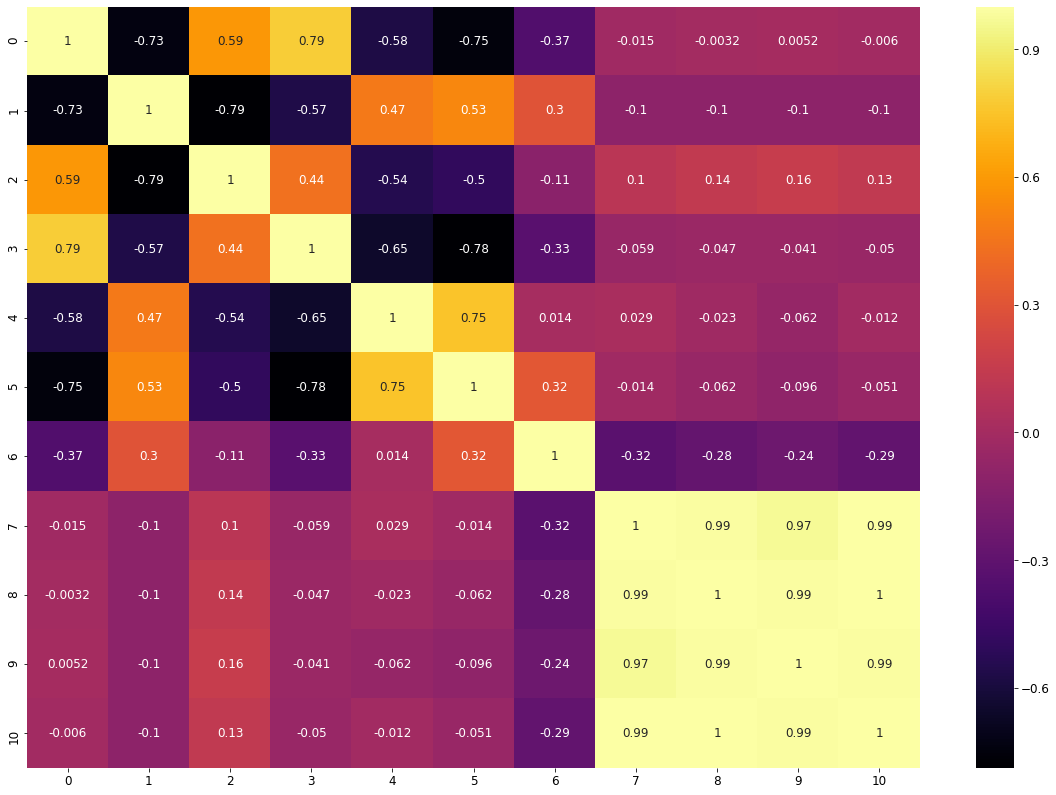

In [55]:
plt.rcParams['figure.figsize'] = (20,14)
model.corrplot(cmap='inferno',annot=True)

In [17]:
model.ftest()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(2.0868930278428162e+21, 0.0)

In [18]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: const       0.000000
Age         0.589173
d180        0.000000
L*          0.916461
SST         0.509335
Alkane      0.321551
Alkanol     0.233371
Sediment    0.339223
Red         0.383237
Green       0.370958
Blue        0.370179
Grey        0.372800
dtype: float64
t-test values: const       6.900655e+10
Age         5.401267e-01
d180       -7.341749e+10
L*         -1.049069e-01
SST        -6.599994e-01
Alkane      9.915356e-01
Alkanol    -1.192101e+00
Sediment   -9.559430e-01
Red        -8.721509e-01
Green      -8.948939e-01
Blue       -8.963511e-01
Grey        8.914520e-01
dtype: float64
Standard errors: const       1.106078e-10
Age         1.189414e-14
d180        2.730475e-11
L*          1.218500e-11
SST         1.249546e-11
Alkane      1.203055e-11
Alkanol     1.498707e-11
Sediment    7.977262e-12
Red         2.106187e-09
Green       4.031256e-09
Blue        8.205054e-10
Grey        6.914340e-09
dtype: float64


In [19]:
model.conf_int()

,0,1
const,7.632662e+00,7.632662e+00
Age,-1.690267e-14,2.975135e-14
d180,-2.004646e+00,-2.004646e+00
L*,-2.517575e-11,2.261917e-11
SST,-3.275334e-11,1.625934e-11
Alkane,-1.166583e-11,3.552327e-11
Alkanol,-4.725904e-11,1.152684e-11
Sediment,-2.327097e-11,8.019352e-12
Red,-5.967608e-09,2.293782e-09
Green,-1.151372e-08,4.298631e-09


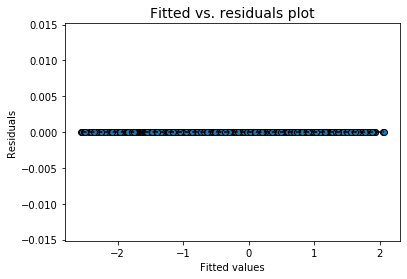

In [20]:
model.fitted_vs_residual()

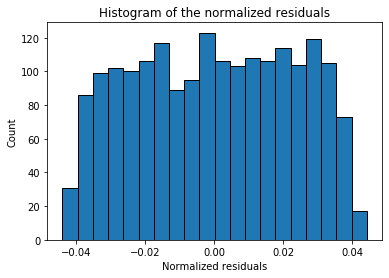

In [21]:
model.histogram_resid()

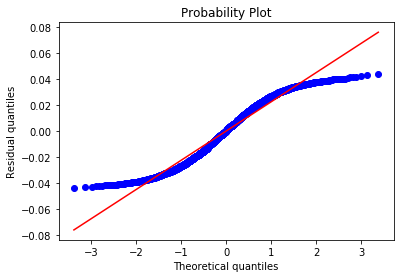

In [22]:
model.qqplot_resid()

In [23]:
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  d180N   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              657.2
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                        0.00
Time:                        19:13:55   Log-Likelihood:                         -1203.1
No. Observations:                1903   AIC:                                      2428.
Df Residuals:                    1892   BIC:                                      2489.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Parameters:  Age         0.000444
d180       -0.159518
L*          0.497302
SST        -0.039933
Alkane      0.003011
Alkanol     0.089963
Sediment   -0.016383
Red         2.621633
Green       1.152320
Blue       -0.064556
Grey       -3.647211
dtype: float64
Standard errors:  Age          0.000016
d180         0.008776
L*           0.015588
SST          0.019802
Alkane       0.019086
Alkanol      0.023686
Sediment     0.012650
Red          3.340843
Green        6.395381
Blue         1.301700
Grey        10.969019
dtype: float64
Predicted values:  [-1.14643398 -0.68860523 -0.27825931 ...  2.11639162  1.9218885
  2.0875374 ]


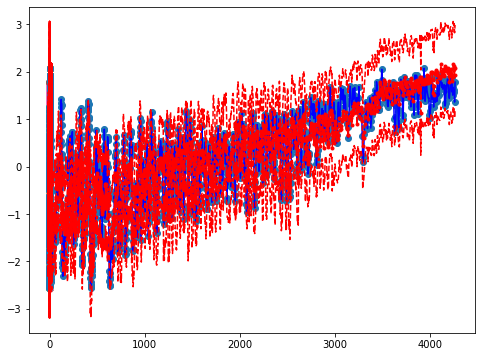

In [24]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
ax.plot(X, y, 'b-', label="True")
ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')


# Ridge Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [26]:
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [27]:
rr = Ridge(alpha=0.1) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=25) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [28]:

print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

ridge regression train score low alpha: 0.9999996989569935
ridge regression test score low alpha: 0.9999996645112561
ridge regression train score high alpha: 0.9892838795771663
ridge regression test score high alpha: 0.9872381578975171


In [29]:
#cross-validation

from sklearn.model_selection import cross_val_score



scores_rr = cross_val_score(rr,X,y,cv = 10)

scores_rr100 = cross_val_score(rr100,X,y,cv = 100)


In [30]:


print ("ridge regression cv score low alpha:", scores_rr)
print ("ridge regression cv score high alpha:", scores_rr100)


print ("Average ridge regression cv score low alpha:", np.mean(scores_rr))
print ("Average ridge regression cv score high alpha:", np.mean(scores_rr100))

ridge regression cv score low alpha: [0.99999871 0.99999902 0.99999955 0.99999936 0.99999942 0.99999937
 0.99999934 0.99999968 0.9999993  0.99999772]
ridge regression cv score high alpha: [ 0.86348809  0.94570265  0.81162814  0.97725766  0.9490304   0.94882863
  0.96517321  0.27293951  0.83378156  0.95214228  0.4718738   0.97694169
  0.94669538  0.91684907  0.95307313  0.9596284   0.90689109  0.98545846
  0.86880879  0.8718766   0.97303739  0.82932772  0.99303581  0.89222969
  0.74308669  0.95434631  0.97113031  0.9346457  -0.45622368  0.96295938
  0.93416272  0.88459899  0.8549135   0.98713489  0.99432243  0.99415897
  0.99065934  0.96811112  0.98163234  0.95121911  0.99524521  0.98029398
  0.95191651  0.97774821  0.97815616  0.99200545  0.96925209  0.96026714
  0.98797537  0.9690243   0.99069377  0.98842777  0.97892768  0.98818429
  0.98846638  0.98837554  0.9634141   0.94572872  0.9164217   0.94124998
  0.98657849  0.95228518  0.9728789   0.90068998  0.98069693  0.97963927
  0.95328

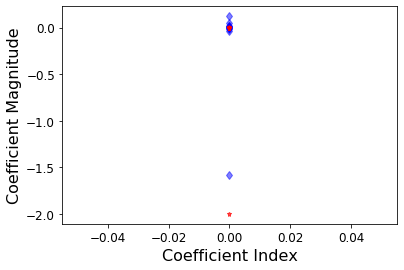

In [31]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.show()

#Multiple Output Regressor

#RFE

In [32]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl
from sklearn import metrics, model_selection


In [33]:
X = X
y = y
y_array = y.values
X.shape, y_array.shape

((1903, 11), (1903, 1))

In [34]:
model2 = LinearRegression()
rfe = RFE(model2, 5)
fit = rfe.fit(X,y_array.ravel())
print("Num Features: %d" %fit.n_features_)
print("Selected Features: %s" % fit.support_)
print ("Feature Ranking: %s" % fit.ranking_)
print ("Estimator: %s" % fit.estimator_)

Num Features: 5
Selected Features: [False  True False False False False False  True  True  True  True]
Feature Ranking: [7 1 6 5 3 2 4 1 1 1 1]
Estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#PCA

In [35]:
dataset1.shape

(1903, 12)

In [36]:
X.shape, y.shape

((1903, 11), (1903, 1))

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
scaler = StandardScaler()
scaler.fit(dataset1)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.transform(dataset1)[1:10])

[ 1.53417761e+03  3.80748607e+00  1.36626727e-11 -2.90495100e-01
 -3.52962149e-01  1.96625629e-01  3.08986973e-01  1.70413720e-01
  9.12422647e-03  7.04318267e-03  6.12745928e-03  7.61519167e-03]
[[-1.30340724 -1.16196977  1.16196977 -1.96014268  0.48307321 -0.34243062
   0.43872307  2.26236704 -1.07572135 -2.2448202  -2.72739491 -1.95313623]
 [-1.30255711 -1.26022324  1.26022324 -1.97733836 -0.16822162 -0.04266776
   3.70627212  2.26236704 -0.64896831 -1.88460591 -2.51884216 -1.5861052 ]
 [-1.30170697 -1.04566974  1.04566974 -2.17682767 -1.16606642  0.45909683
   5.97065384  2.26236704 -0.77512537 -2.06130384 -2.6226201  -1.74225974]
 [-1.30085684 -1.02762318  1.02762318 -2.08336002 -1.61484475  1.12496311
   6.24534639  2.26236704 -0.78408181 -2.03613987 -2.6015343  -1.72918997]
 [-1.30000671 -1.08978354  1.08978354 -2.06487742 -1.90545827  2.05401826
   5.41955277  2.26236704 -0.82890805 -2.06403208 -2.62523441 -1.76106576]
 [-1.29915657 -0.95142661  0.95142661 -1.93737648 -2.047608

In [39]:
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.transform(X)[1:10])

[ 1.53417761e+03  3.80748607e+00 -2.90495100e-01 -3.52962149e-01
  1.96625629e-01  3.08986973e-01  1.70413720e-01  9.12422647e-03
  7.04318267e-03  6.12745928e-03  7.61519167e-03]
[[-1.30340724 -1.16196977 -1.96014268  0.48307321 -0.34243062  0.43872307
   2.26236704 -1.07572135 -2.2448202  -2.72739491 -1.95313623]
 [-1.30255711 -1.26022324 -1.97733836 -0.16822162 -0.04266776  3.70627212
   2.26236704 -0.64896831 -1.88460591 -2.51884216 -1.5861052 ]
 [-1.30170697 -1.04566974 -2.17682767 -1.16606642  0.45909683  5.97065384
   2.26236704 -0.77512537 -2.06130384 -2.6226201  -1.74225974]
 [-1.30085684 -1.02762318 -2.08336002 -1.61484475  1.12496311  6.24534639
   2.26236704 -0.78408181 -2.03613987 -2.6015343  -1.72918997]
 [-1.30000671 -1.08978354 -2.06487742 -1.90545827  2.05401826  5.41955277
   2.26236704 -0.82890805 -2.06403208 -2.62523441 -1.76106576]
 [-1.29915657 -0.95142661 -1.93737648 -2.04760806  2.88589019  5.15823756
   2.26236704 -0.79438566 -2.03580935 -2.65555619 -1.73767226

In [40]:
scaler = StandardScaler()
scaler.fit(y)
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
print(scaler.transform(y)[1:10])

[1.36626727e-11]
[[1.16196977]
 [1.26022324]
 [1.04566974]
 [1.02762318]
 [1.08978354]
 [0.95142661]
 [0.88325074]
 [0.77697657]
 [0.84715762]]


In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [42]:
pca = PCA(whiten=True)
pca.fit(dataset1)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.99999656, 0.99999758, 0.99999846, 0.9999991 , 0.99999956,
       0.99999975, 0.99999988, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [43]:
pca = PCA(n_components=3,whiten=True)
pca = pca.fit(dataset1)
dataPCA = pca.transform(dataset1)

pca.components_

array([[ 9.99999012e-01, -3.11106469e-04,  6.23658332e-04,
         5.02894315e-04,  7.02242124e-04, -4.72130809e-04,
        -6.29506596e-04, -3.53262951e-04, -6.50602645e-06,
        -1.32419996e-06,  2.18032640e-06, -2.50562834e-06],
       [ 1.97280810e-04,  4.10474159e-02, -8.22855372e-02,
         2.96372150e-02,  3.36007310e-02, -2.13479069e-01,
        -3.76441603e-03,  7.85132506e-01, -3.04348824e-01,
        -2.84770373e-01, -2.64543762e-01, -2.89500393e-01],
       [ 9.91559021e-04,  1.99619034e-01, -4.00165494e-01,
        -6.01641947e-01, -1.03312411e-01,  4.54120198e-01,
         2.39665571e-01, -1.67419674e-01, -1.67094688e-01,
        -1.85932211e-01, -1.99549699e-01, -1.82665700e-01]])

In [44]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=.20, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_X)
# Apply transform to both the training set and the test set.
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [46]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [47]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [48]:
train_X = pca.transform(train_X)
test_X = pca.transform(test_X)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.predict(test_X[0].reshape(1,-1))

array([[-0.18436355]])

In [53]:
lr.predict(test_X[0:10])

array([[-0.18436355],
       [-0.54224493],
       [-1.01765886],
       [-0.22057536],
       [ 1.69454793],
       [-0.61578136],
       [ 0.99513289],
       [-0.07830178],
       [-0.57078854],
       [-1.11404361]])

In [54]:
lr.score(test_X, test_y)

0.9084587598442165

fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(train_copy.columns):
  linear_regr_test.fit(train_copy[e].values[:,np.newaxis], y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('SalePrice')
  axes[i].scatter(train_copy[e].values[:,np.newaxis], y,color='g')
  axes[i].plot(train_copy[e].values[:,np.newaxis], 
  linear_regr_test.predict(train_copy[e].values[:,np.newaxis]),color='k')